In [9]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df.duplicated().sum()

0

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot: xlabel='Survived', ylabel='count'>

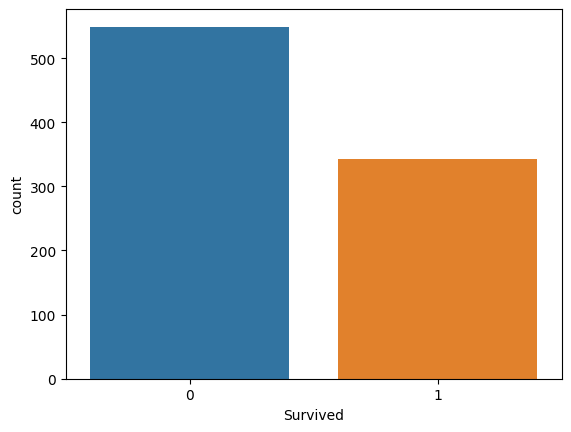

In [11]:
sns.countplot(x='Survived', data=df)

In [13]:
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

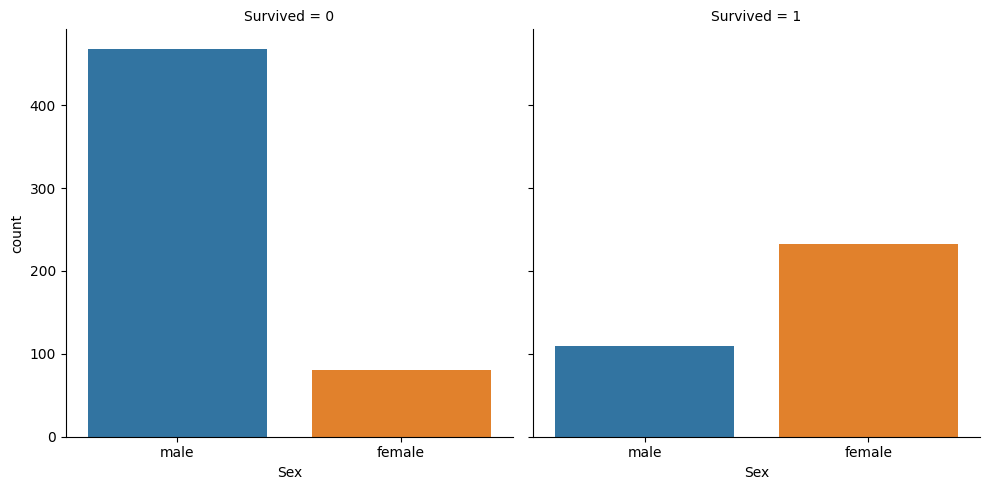

In [14]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df)

In [18]:
print("% of women survived: " , df[df.Sex == 'female'].Survived.sum()/df[df.Sex == 'female'].Survived.count())
print("% of men survived:   " , df[df.Sex == 'male'].Survived.sum()/df[df.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


Women were more likely to survive than men

74 % of women survived but only 19% of men 

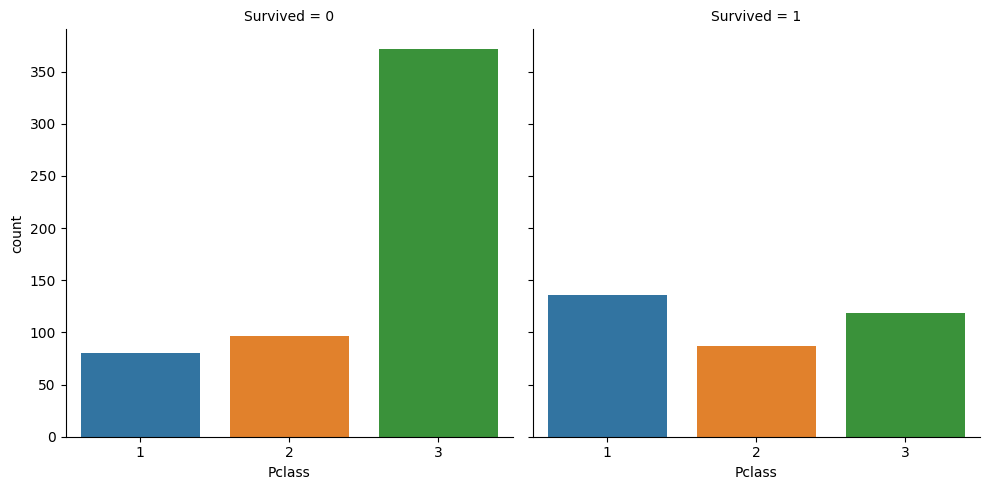

In [24]:
sns.catplot(x='Pclass',col='Survived', kind='count', data=df)

Passenger Class and Sex :

Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 die

In [26]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

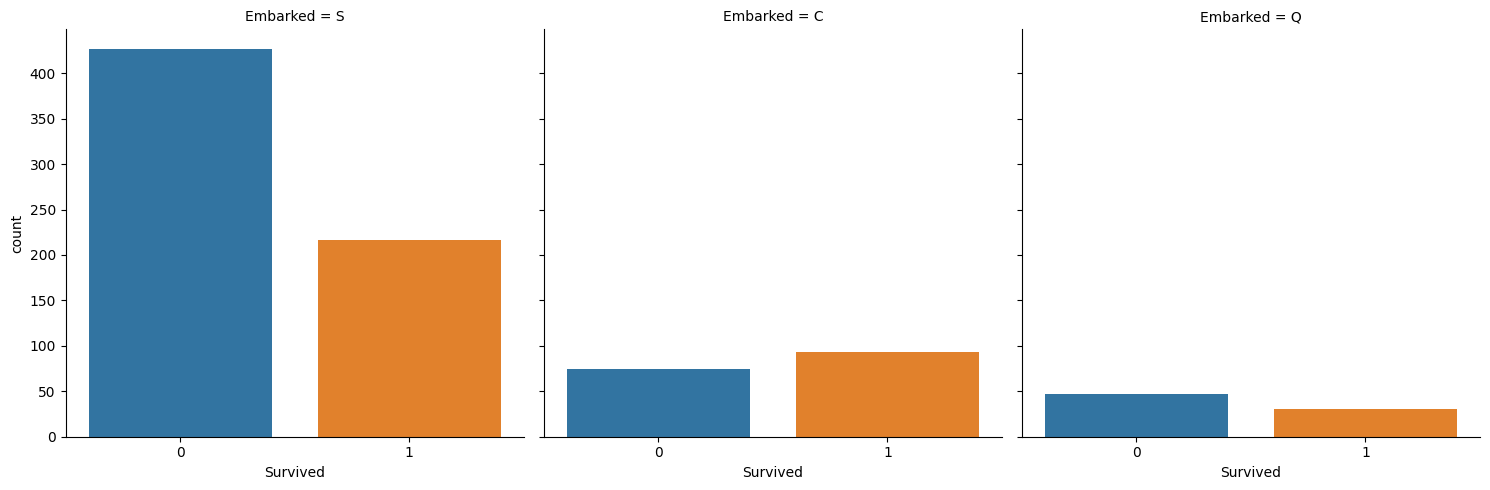

In [27]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df)

In [29]:
df.corr()

C:\Users\dilip\AppData\Local\Temp\ipykernel_20224\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


none of the features are correlated

In [31]:
numerical_columns=[features for features in df.columns if df[features].dtype!='O']
numerical_columns

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [32]:
categorical_columns=[features for features in df.columns if df[features].dtype=='O']
categorical_columns

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [33]:
df[categorical_columns].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [34]:
for features in categorical_columns:
    print(df[features].value_counts())

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 14

C:\Users\dilip\AppData\Local\Temp\ipykernel_20224\120156023.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


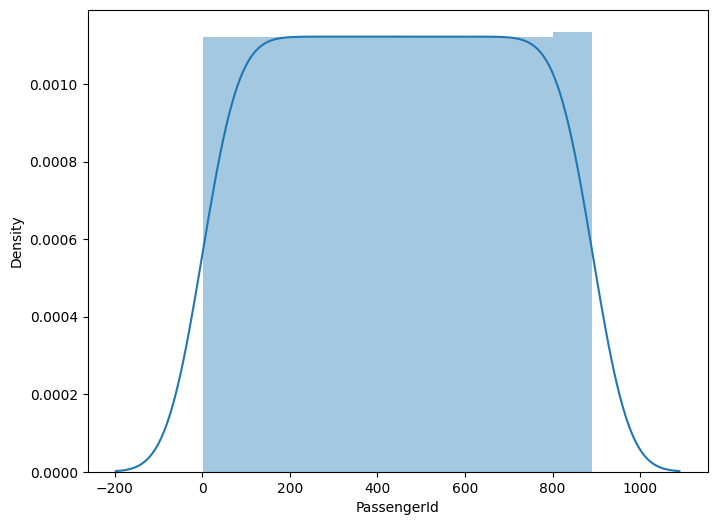

C:\Users\dilip\AppData\Local\Temp\ipykernel_20224\120156023.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


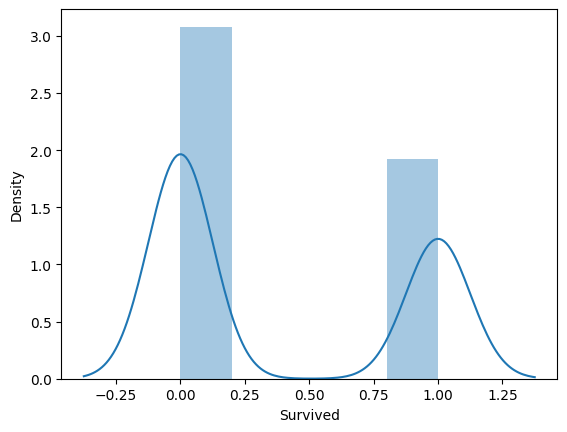

C:\Users\dilip\AppData\Local\Temp\ipykernel_20224\120156023.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


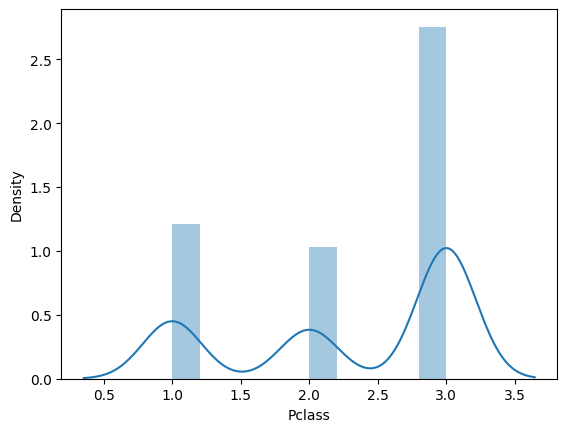

C:\Users\dilip\AppData\Local\Temp\ipykernel_20224\120156023.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


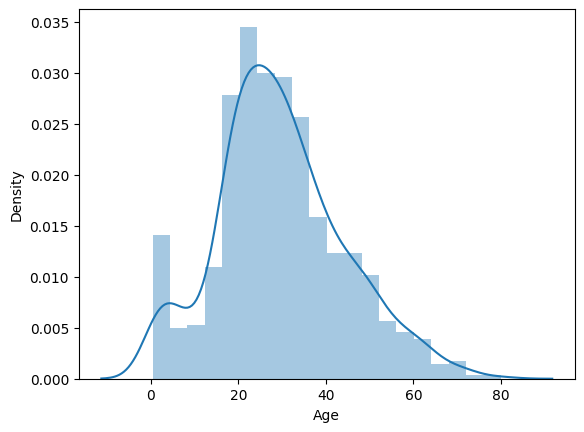

C:\Users\dilip\AppData\Local\Temp\ipykernel_20224\120156023.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


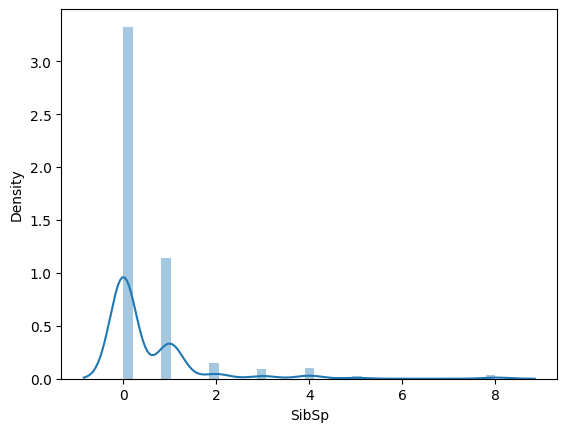

C:\Users\dilip\AppData\Local\Temp\ipykernel_20224\120156023.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


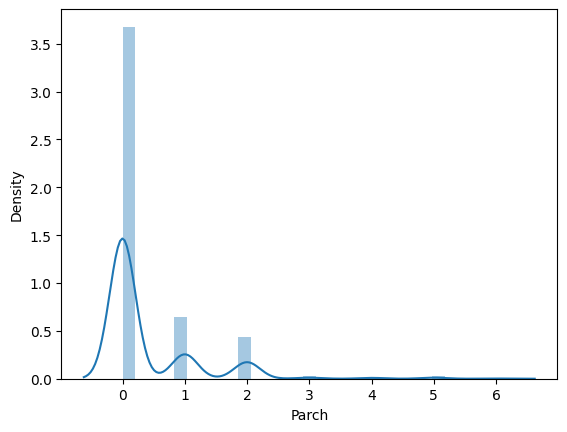

C:\Users\dilip\AppData\Local\Temp\ipykernel_20224\120156023.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


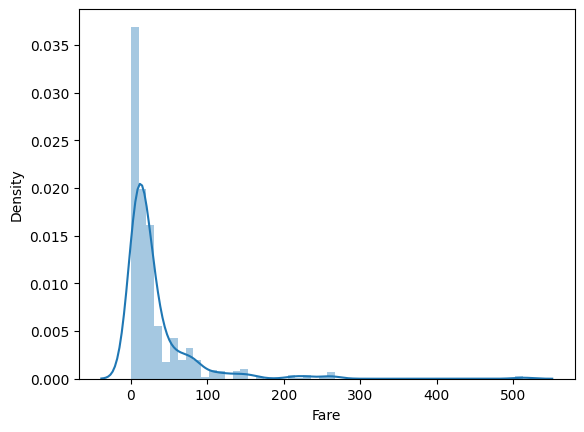

In [35]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=1
for i in numerical_columns:
    sns.distplot(df[i],kde=True)
    print('\n')
    plt.show()
    

Most of the features follows gaussian distribution

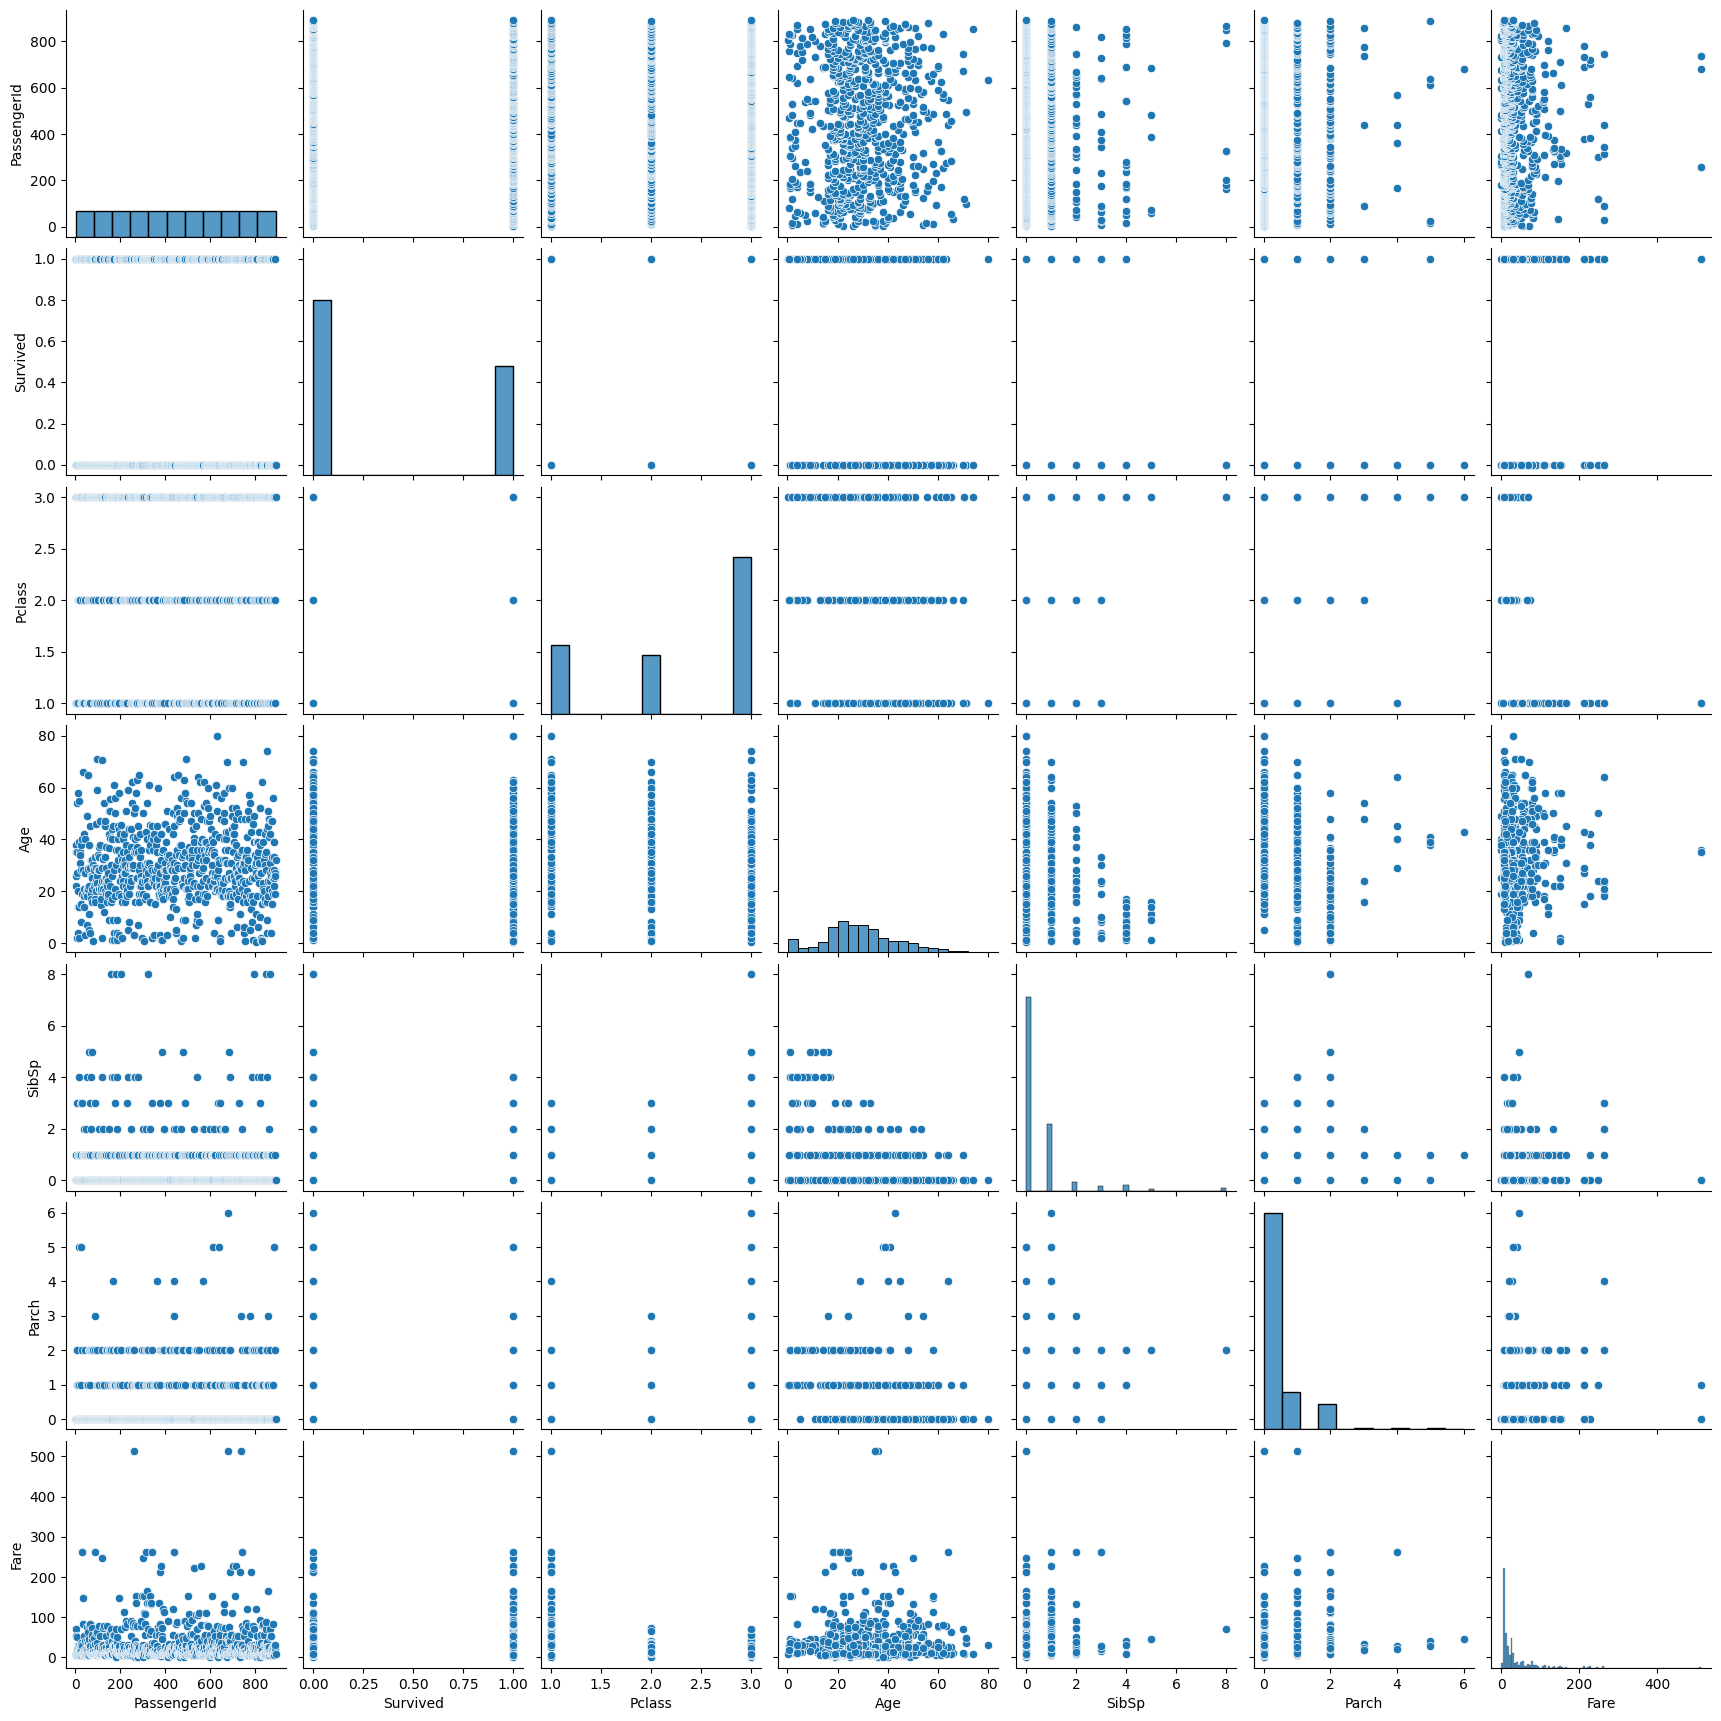

In [37]:
sns.pairplot(df)

In [41]:
df_ml = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare'],axis=1,inplace=True)
df_ml.dropna(inplace=True)

In [42]:
df_ml

,Survived,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,1,0,1,0,1,0,1
1,1,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0
4,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
886,0,0,0,1,0,1,1,0
887,1,0,0,0,0,1,0,0
888,0,1,2,0,0,1,0,1
889,1,0,0,1,0,0,0,0


# model training

In [44]:
#independent and dependent feature
X=df.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare','Survived'],axis=1)
Y=df[['Survived']]

In [45]:
X

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S
...,...,...,...,...,...
886,2,male,0,0,S
887,1,female,0,0,S
888,3,female,1,2,S
889,1,male,0,0,C


In [46]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [65]:
# Define which columns should be onehot encoded and which should be in nuemerical pipeline
OH_cols = ['Sex', 'Embarked', 'Pclass']
num_cols = ['SibSp','Parch']

In [66]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OneHotEncoder
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [67]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median'))
    

    ])

In [68]:
# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('OneHotEncoder',OneHotEncoder())
    ])

In [69]:
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,num_cols),
('cat_pipeline',cat_pipeline,OH_cols)
])

In [70]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [71]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [72]:
X_train.head()

,num_pipeline__SibSp,num_pipeline__Parch,cat_pipeline__Sex_female,cat_pipeline__Sex_male,cat_pipeline__Embarked_C,cat_pipeline__Embarked_Q,cat_pipeline__Embarked_S,cat_pipeline__Pclass_1,cat_pipeline__Pclass_2,cat_pipeline__Pclass_3
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [77]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

In [78]:
from sklearn.model_selection import cross_val_score

In [81]:
prediction=cross_val_score(model, X_train, y_train, cv=10)

In [82]:
prediction

array([0.80952381, 0.73015873, 0.79365079, 0.82258065, 0.72580645,
       0.82258065, 0.75806452, 0.83870968, 0.83870968, 0.75806452])

In [83]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [84]:
y_pred=model.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.753731343283582

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}


In [90]:
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [91]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [92]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [93]:
model_2=DecisionTreeClassifier(max_depth=3,min_samples_leaf=3,min_samples_split=2)

In [94]:
model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

In [96]:
y_pred=model_2.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred)

0.7686567164179104

[Text(0.5, 0.875, 'x[3] <= 0.5\ngini = 0.469\nsamples = 623\nvalue = [389, 234]'),
 Text(0.25, 0.625, 'x[9] <= 0.5\ngini = 0.381\nsamples = 219\nvalue = [56, 163]'),
 Text(0.125, 0.375, 'x[6] <= 0.5\ngini = 0.112\nsamples = 117\nvalue = [7, 110]'),
 Text(0.0625, 0.125, 'gini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.1875, 0.125, 'gini = 0.149\nsamples = 74\nvalue = [6, 68]'),
 Text(0.375, 0.375, 'x[1] <= 0.5\ngini = 0.499\nsamples = 102\nvalue = [49, 53]'),
 Text(0.3125, 0.125, 'gini = 0.46\nsamples = 64\nvalue = [23, 41]'),
 Text(0.4375, 0.125, 'gini = 0.432\nsamples = 38\nvalue = [26, 12]'),
 Text(0.75, 0.625, 'x[7] <= 0.5\ngini = 0.29\nsamples = 404\nvalue = [333, 71]'),
 Text(0.625, 0.375, 'x[1] <= 0.5\ngini = 0.228\nsamples = 327\nvalue = [284, 43]'),
 Text(0.5625, 0.125, 'gini = 0.178\nsamples = 274\nvalue = [247, 27]'),
 Text(0.6875, 0.125, 'gini = 0.422\nsamples = 53\nvalue = [37, 16]'),
 Text(0.875, 0.375, 'x[1] <= 1.5\ngini = 0.463\nsamples = 77\nvalue = [49, 28]'),
 

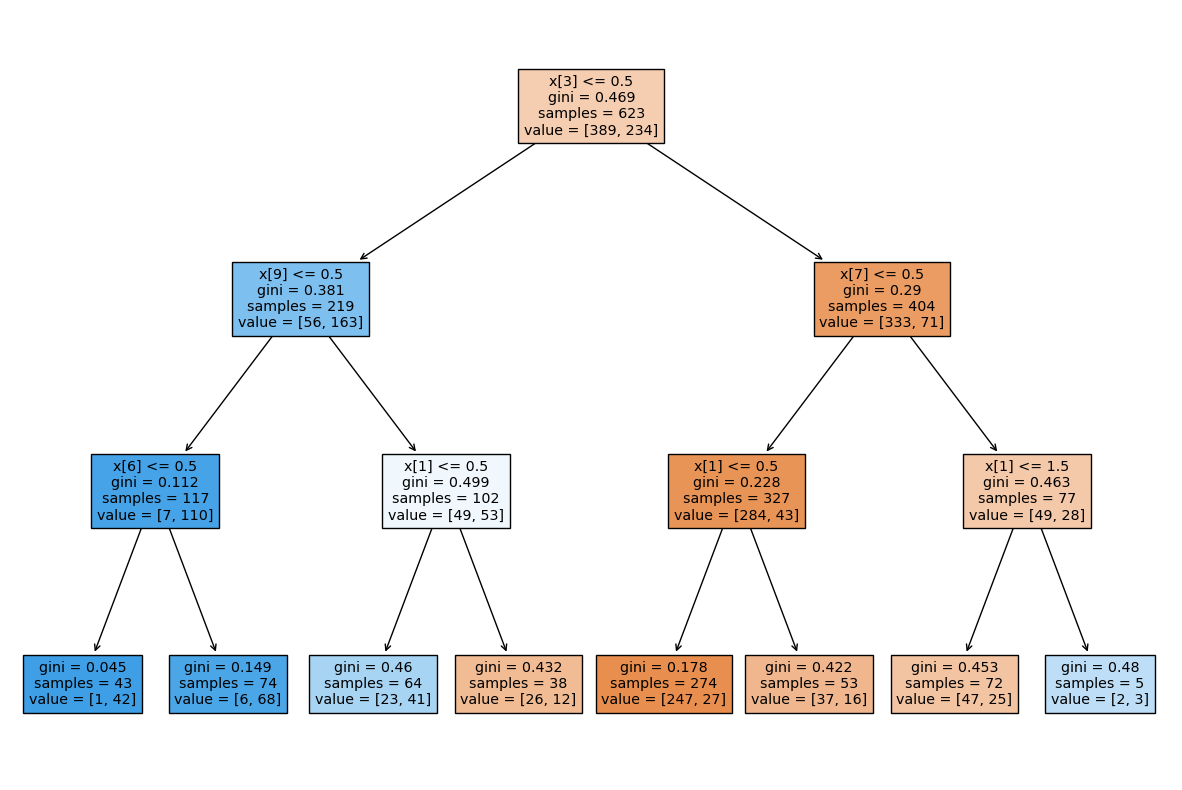

In [98]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model_2,filled=True)

In [100]:
model_2.score(X_train,y_train)

0.8202247191011236

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[144,  16],
       [ 46,  62]], dtype=int64)

In [104]:
y_test_pred =model_2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(fp+tn)
F1_score = 2*recall*precision/(recall+precision)

print("accuracy  ",accuracy)
print('precision  ',precision)
print("recall  ",recall)
print("F1_score",F1_score)

accuracy   0.7686567164179104
precision   0.7948717948717948
recall   0.5740740740740741
F1_score 0.6666666666666666
